In [ ]:
from torchvision.transforms import v2
import torchvision.transforms as transforms
import torch
import requests
from PIL import Image
from io import BytesIO
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt

# Аугментации изображения

(1000, 567)


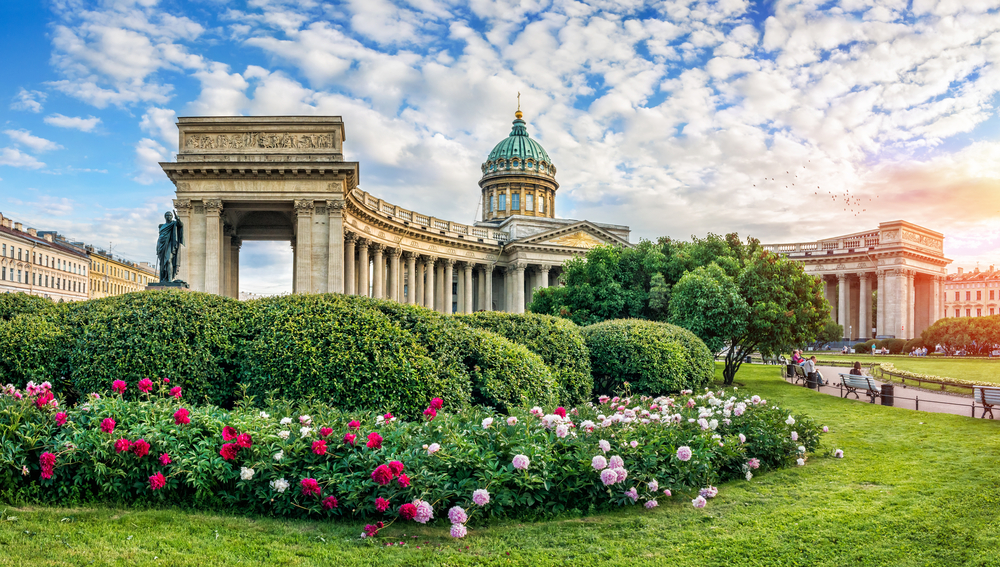

In [ ]:
response = requests.get('https://raw.githubusercontent.com/DmitryRyumin/HSE_Fundamentals_of_DL_2025/refs/heads/main/tutorials/imgs/example.jpg')
image = Image.open(BytesIO(response.content))
print(image.size)
image

In [ ]:
def show_and_pass(tensor, ax, title='Processed image'):
    ax.imshow(v2.ToPILImage()(tensor))
    ax.axis('off')
    ax.set_title(title)
    return tensor

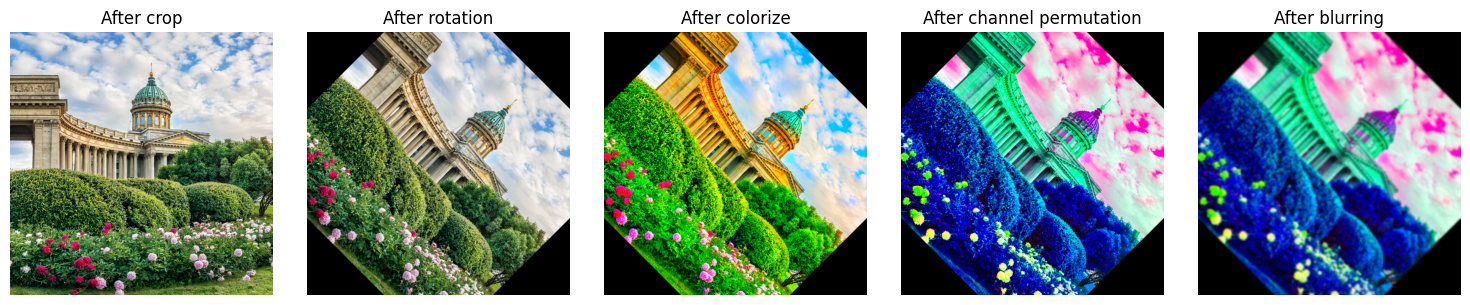

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

transform_pipeline = v2.Compose([
    v2.PILToTensor(),
    v2.CenterCrop(500),
    lambda processed_tensor : show_and_pass(processed_tensor, axes[0], "After crop"),
    v2.RandomRotation(90),
    lambda processed_tensor : show_and_pass(processed_tensor, axes[1], "After rotation"),
    v2.ColorJitter(saturation=5),
    lambda processed_tensor : show_and_pass(processed_tensor, axes[2], "After colorize"),
    v2.RandomChannelPermutation(),
    lambda processed_tensor : show_and_pass(processed_tensor, axes[3], "After channel permutation"),
    v2.GaussianBlur(19),
    lambda processed_tensor : show_and_pass(processed_tensor, axes[4], "After blurring"),
    v2.ToPILImage()
])
image_transformed = transform_pipeline(image)

plt.tight_layout()
plt.show()

# Выводы


В этой работе мы поняли, как можно легко преобразовывать изображения с помощью функций из модуля `torchvision.transforms.v2`, а также применять композиции этих преобразований. Это действие полезно при обучении моделей, у которых входные данные $-$ изображения, ведь таким образом можно разнообразить тренировочный датасет и расширить множество понимаемых моделью картинок